In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


**First we import the data,then concat both training and test dataset,later again we will split dataset into train and test and apply different algorithims on test set for prediction.let's do it.**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
training=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
training['train_test']=1
test['train_test']=0
all_data=pd.concat([training,test])
all_data.columns



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

#it's time for analysing the data .first with the help of .info() and .describe()to know the nature of data.
#then visualising the data
#value count
#taking care of missing data
#correlation between the features



In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


# DATA EXPLORATION
  **NUMERICAL DATA**
   * make histogram to understand distribution
   * corr plot
   * Pivot table comparing survival rate across numeric variables
   
  **CATEGORICAL DATA**
   * Made bar charts to understand balance of classes
   * Made pivot tables to understand relationship with survival
   

In [5]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [6]:
df_num=training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


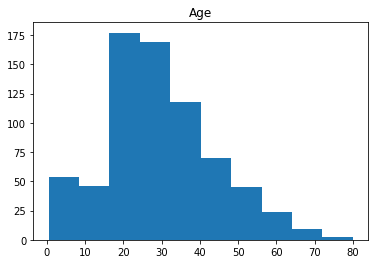

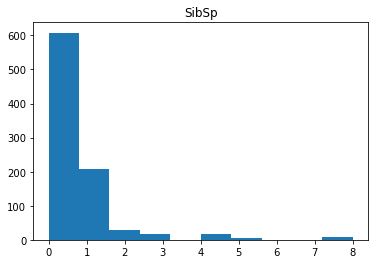

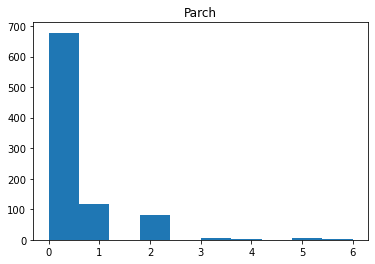

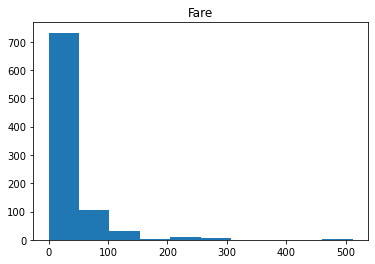

In [7]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


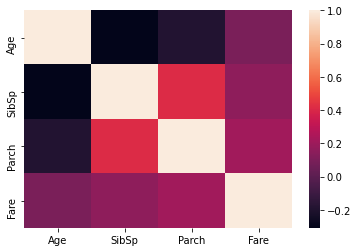

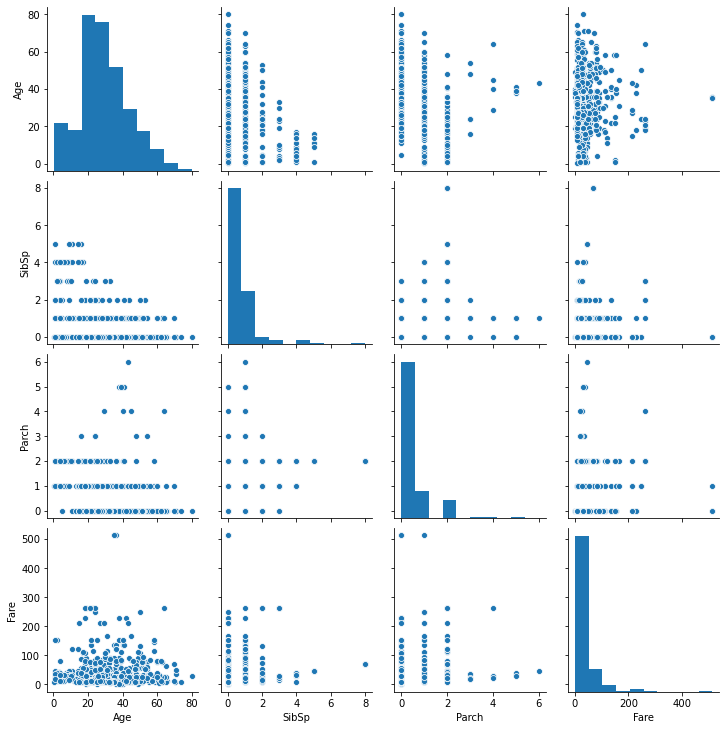

In [8]:
print(df_num.corr())
sns.heatmap(df_num.corr())
sns.pairplot(df_num)

In [9]:
pd.pivot_table(training,index='Survived',values=['Age','SibSp','Parch','Fare'],aggfunc='count')

,Age,Fare,Parch,SibSp
Survived,,,,
0,424,549,549,549
1,290,342,342,342


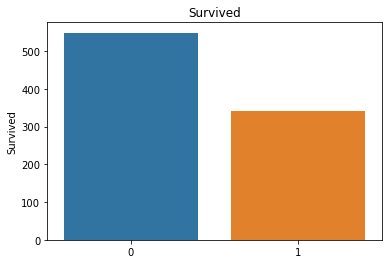

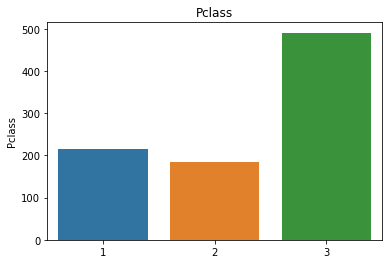

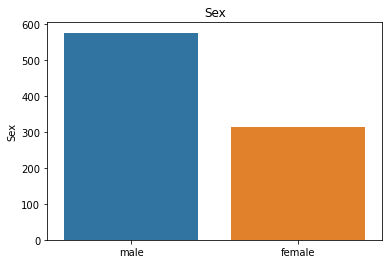

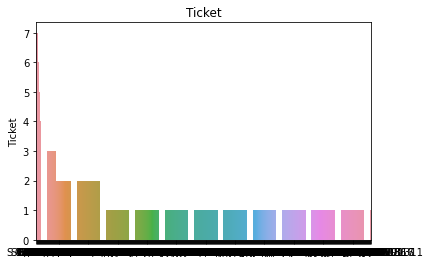

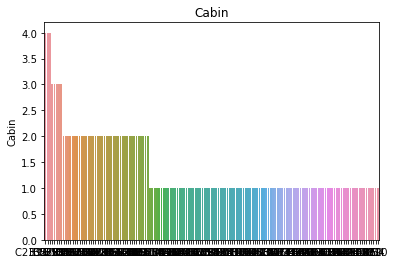

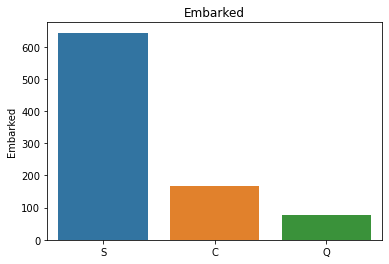

In [10]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts())
    plt.title(i)
    plt.show()
    

**It looks like ticket and cabin bar chat are so noisy. we have to do some feature engineering.**

In [11]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked',
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [12]:
training['cabin_multiple']=training.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [13]:
pd.pivot_table(training,index='Survived',columns='cabin_multiple',
               values='Ticket',aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [14]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
print(training['cabin_adv'].value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv',
               values='Name',aggfunc='count')


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [15]:
#understand ticket values better 
#numeric vs non numeric
training['numeric_ticket']=training.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join
(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [16]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [17]:
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
wep            3
pp             3
sotono2        2
ppp            2
swpp           2
scah           2
fc             1
sop            1
sca4           1
as             1
scahbasle      1
sc             1
scow           1
fa             1
casoton        1
sp             1
Name: ticket_letters, dtype: int64

In [18]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(training,index='Survived',columns='numeric_ticket',
               values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [19]:
pd.pivot_table(training,index='Survived',columns='ticket_letters',
               values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [20]:
#feature engineering on person's name
training['Name'].head(20)
training['name_title']=training.Name.apply(lambda x:x.split(',')[1].split('.')[0])

In [21]:
training['name_title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Lady              1
 Capt              1
 Jonkheer          1
 Ms                1
 Don               1
 the Countess      1
 Mme               1
 Sir               1
Name: name_title, dtype: int64

**DATA PREPROCESSING FOR MODEL**

  1.drop null values from embarked(2 values missing)
  
  2. Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with)   (Variables: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title')
  
  3.Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use onehot encoder).
  
  4.Impute data with mean for fare and age (Should also experiment with median).
  
  5.Normalized fare using logarithm to give more semblance of a normal distribution.
  
  6.Scaled data 0-1 with standard scaler
  


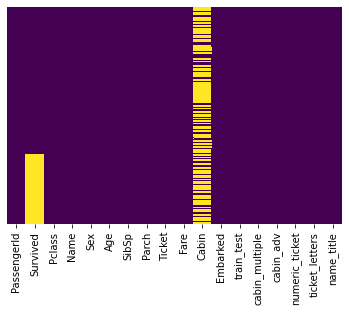

In [22]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])

all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join
(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())



#impute nulls for continuous data 
all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#we are not going to include cabin in our data,we have already our cabin_multiple etc.






In [23]:
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','SibSp','Parch','Embarked','cabin_adv',
                                       'cabin_multiple','numeric_ticket','name_title','train_test']])


age=all_data['Age']
fare=all_data['Fare']
all_dummies=pd.concat([all_dummies,age,fare],axis=1)

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

# MODEL BUILDING(CROSS VALIDATION PERFORMANCE)

1.      Before going further, I like to see how various different models perform with default  parameters. I tried the following models using 5 fold cross validation to get a baseline.
2.      With a validation set basline, we can see how much tuning improves each of the models. 
3.      Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set.

            1.Naive Bayes (72.6%)
            2.Logistic Regression (82.1%)
            3.Decision Tree (78.6%)
            4.KNearest Neighbor (81.5%)
            5.Random Forest (80.6%)
            6.Support Vector Classifier (83.2%)
            8.Xtreme Gradient Boosting (81.8%)

In [24]:
#first  we need some feature scaling in our data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','Fare']]= scale.fit_transform(all_dummies_scaled[['Age','Fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [25]:
#let's import class of different algorithm
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [26]:
#let's see naive bayes algorithim.
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.65730337 0.71348315 0.76404494 0.74719101 0.73446328]
0.7232971497492542


In [27]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.82022472 0.80898876 0.82022472 0.84180791]
0.8211705706849488


In [28]:
#this is for scaled data
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.82022472 0.80898876 0.82022472 0.84180791]
0.8211705706849488


In [29]:
dt = DecisionTreeClassifier(criterion='gini',random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.75842697 0.83146067 0.75280899 0.84180791]
0.7897098965276456


In [30]:
dt = tree.DecisionTreeClassifier(criterion='gini',random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

NameError: name 'tree' is not defined

In [31]:
knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.68539326 0.7247191  0.73033708 0.74719101 0.74011299]
0.725550688757697


In [32]:
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.78651685 0.84269663 0.79213483 0.84180791]
0.812181806640005


In [33]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.80337079 0.84831461 0.76966292 0.82485876]
0.8031739986034406


In [34]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.80337079 0.85393258 0.76966292 0.82485876]
0.8042975941090585


In [35]:
svc = SVC(kernel='rbf',probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
0.8324319177299563


In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.80898876 0.87078652 0.78089888 0.83615819]
0.8189170316765061


In [37]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),
                                            ('svc',svc),('xgb',xgb)], voting = 'soft') 

In [38]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83146067 0.82022472 0.83707865 0.79775281 0.85310734]
0.8279248397130706


In [39]:
voting_clf.fit(X_train_scaled,y_train)
y_pred = voting_clf.predict(X_test_scaled).astype(int)
basic_output = {'PassengerId': test.PassengerId, 'Survived': y_pred}
basic_output=pd.DataFrame(data=basic_output)
basic_output.to_csv('basic_output.csv', index=False)
print('successfully saved,thanks Ken Jee')

successfully saved,thanks Ken Jee


# INSPIRED FROM KEN JEE